In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import pandas_profiling



* 1     Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

* 2    Прочитайте базу Brent и сделайте ее перрасчет (ресемплинг) в представление по неделям , по месяцам.

* 3    Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

* 4    Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.



# 1     Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [2]:
df = pd.read_csv('DUQ_hourly.csv', index_col=[0])

In [3]:
df.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null float64
dtypes: float64(1)
memory usage: 1.8+ MB


In [5]:
df.isnull().sum()

DUQ_MW    0
dtype: int64

Как видим датасет не содержит пропущенных значений, тип данных int64

In [6]:
df.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


Нарисуем ящик с усами

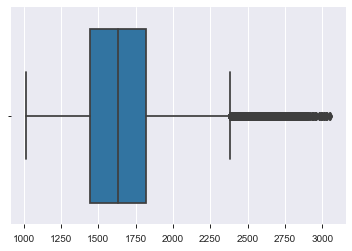

In [7]:
# seaborn

sns.boxplot(df.values);

Посмотрим на распределение целевой переменной

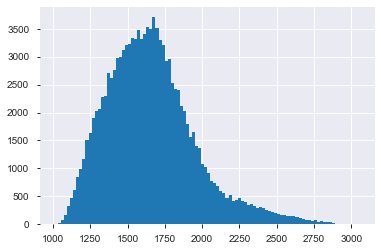

In [8]:
df.DUQ_MW.hist(bins=100)

Построим график потребления энергии по нашим данным

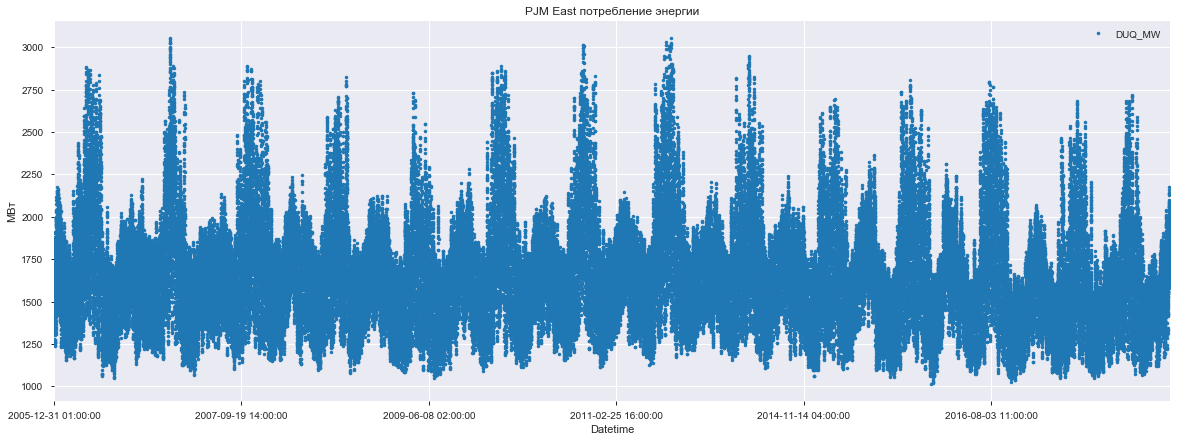

In [9]:
df.plot( style = '.', figsize = ( 20, 7 ), title = 'PJM East потребление энергии' )
plt.ylabel ( 'МВт' );

In [10]:
df['data'] = pd.to_datetime(df.index)

Посмотрим, есть ли дубликаты

In [11]:
df.loc[df.loc[df.index.duplicated()].index]

,DUQ_MW,data
Datetime,,
2014-11-02 02:00:00,1272.0,2014-11-02 02:00:00
2014-11-02 02:00:00,1240.0,2014-11-02 02:00:00
2015-11-01 02:00:00,1113.0,2015-11-01 02:00:00
2015-11-01 02:00:00,1138.0,2015-11-01 02:00:00
2016-11-06 02:00:00,1121.0,2016-11-06 02:00:00
2016-11-06 02:00:00,1107.0,2016-11-06 02:00:00
2017-11-05 02:00:00,1131.0,2017-11-05 02:00:00
2017-11-05 02:00:00,1105.0,2017-11-05 02:00:00


да, мы видим 4 дублирующихся записи

Теперь посмотрим, а есть ли разрывы в данных

In [12]:
df['hour'] = df['data'].dt.hour
df['year'] = df['data'].dt.year
df['month'] = df['data'].dt.month
df['day'] = df['data'].dt.day

In [13]:
df_group = df.groupby(['year', 'month', 'day']).agg({'hour':'count'})

In [14]:
df_group.loc[df_group.hour != 24]

hour
year month day      
2005 1     1      23
     4     3      23
     10    30     23
2006 4     2      23
     10    29     23
2007 3     11     23
     11    4      23
2008 3     9      23
     11    2      23
2009 3     8      23
     11    1      23
2010 3     14     23
     11    7      23
     12    10     23
2011 3     13     23
     11    6      23
2012 3     11     23
     11    4      23
2013 3     10     23
     11    3      23
2014 3     9      23
     11    2      25
2015 3     8      23
     11    1      25
2016 3     13     23
     11    6      25
2017 3     12     23
     11    5      25
2018 3     11     23
     8     3       1

Как мы видим есть и разрывы и дубликаты.

Теперь посмотрим на порядок представления данных, есть ли несортированные данные.

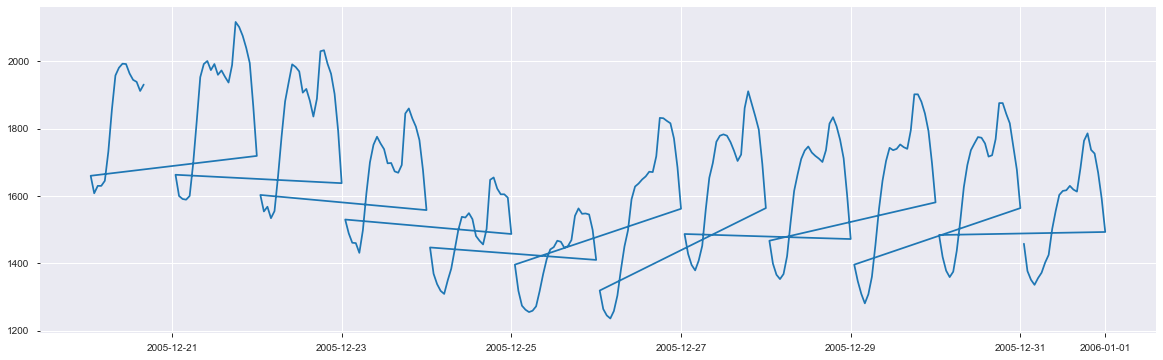

In [15]:
plt.figure(figsize=(20,6))
plt.plot(df.iloc[:280]['data'], df.iloc[:280]['DUQ_MW'].values);

Видим непонятные графики, поспотрим из-за чего так происходит

In [16]:
df.iloc[8750:8765]

,DUQ_MW,data,hour,year,month,day
Datetime,,,,,,
2005-01-01 17:00:00,1388.0,2005-01-01 17:00:00,17,2005,1,1
2005-01-01 18:00:00,1522.0,2005-01-01 18:00:00,18,2005,1,1
2005-01-01 19:00:00,1559.0,2005-01-01 19:00:00,19,2005,1,1
2005-01-01 20:00:00,1546.0,2005-01-01 20:00:00,20,2005,1,1
2005-01-01 21:00:00,1541.0,2005-01-01 21:00:00,21,2005,1,1
2005-01-01 22:00:00,1534.0,2005-01-01 22:00:00,22,2005,1,1
2005-01-01 23:00:00,1497.0,2005-01-01 23:00:00,23,2005,1,1
2005-01-02 00:00:00,1389.0,2005-01-02 00:00:00,0,2005,1,2
2006-12-31 01:00:00,1304.0,2006-12-31 01:00:00,1,2006,12,31


Видно,что дата данные у нас отстортированы по годам по возрастанию, но по датам внутри года по убыванию, и получается что данные за начало будущего периода попадают перед данными за текущий

Отсортируем их

In [17]:
df = df.sort_index()

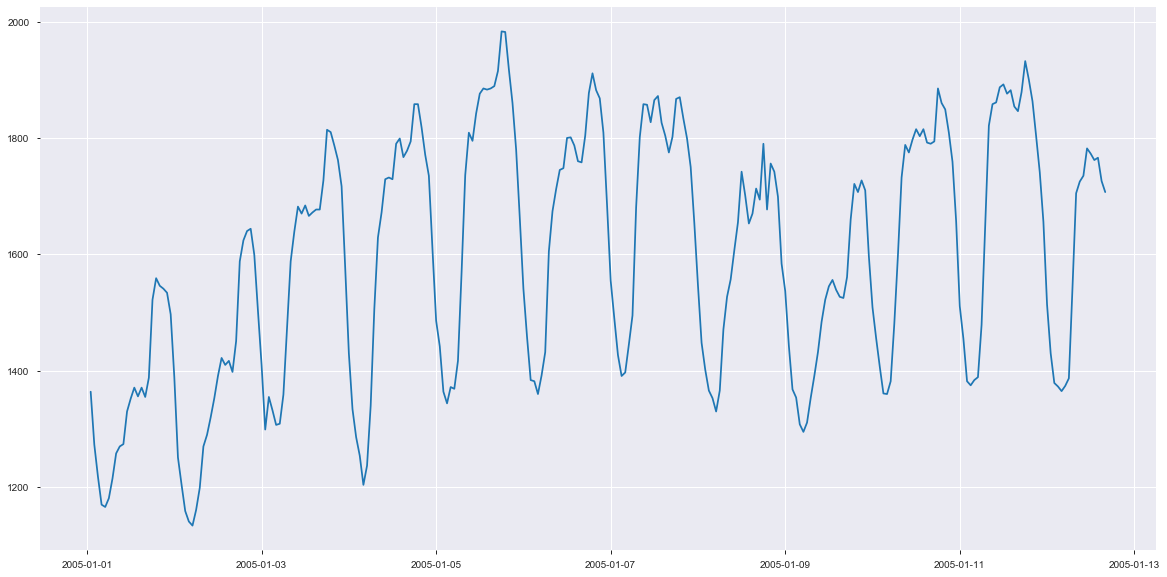

In [18]:
plt.figure(figsize=(20,10))
plt.plot(df.iloc[:280]['data'], df.iloc[:280]['DUQ_MW'].values);

Таким образом, суммируя все вышесказанное, мы имеем:
* датасет содержит 119068 наблюдений с 2005-12-31 01:00:00 по 2018-01-02 00:00:00
* пропущенных значений целевой переменной нет
* тип данных целевой перменной - int64
* целевая перменная имеет нормальное распределение
* присутствуют дубликаты и разрывы ряда
* данные не упорядочены по времени наблюдений

# 2 Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

In [19]:
df_brent = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0])

In [20]:
df_brent.head()

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


### По неделям

In [21]:
df_brent.resample("W").apply(['mean', 'min', 'max']).head(10)

Значение              
                 mean    min    max
Дата                               
2010-09-05  76.616000  76.37  76.89
2010-09-12  77.673333  76.87  78.41
2010-09-19  78.693333  77.97  79.20
2010-09-26  78.518333  77.93  79.36
2010-10-03  81.211667  78.14  83.81
2010-10-10  84.146667  83.11  85.30
2010-10-17  83.498333  82.52  84.84
2010-10-24  82.795000  80.89  84.34
2010-10-31  83.361667  83.14  83.55
2010-11-07  87.003333  84.59  88.61

### По месяцам

In [22]:
df_brent.resample("M").apply(['mean', 'min', 'max']).head(10)

Значение                
                  mean     min     max
Дата                                  
2010-09-30   78.228148   76.37   82.11
2010-10-31   83.473462   80.89   85.30
2010-11-30   86.178077   83.00   89.00
2010-12-31   92.232308   88.92   94.59
2011-01-31   97.033200   93.72  100.56
2011-02-28  104.451250   99.26  113.88
2011-03-31  114.811538  108.19  117.17
2011-04-30  123.197826  119.10  126.90
2011-05-31  114.345385  109.24  125.39
2011-06-30  113.530385  105.05  119.11

# 3 Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

In [23]:
df_brent.resample("W").std().head().values

array([[0.18568791],
       [0.64975893],
       [0.53972833],
       [0.59606767],
       [2.40858811]])

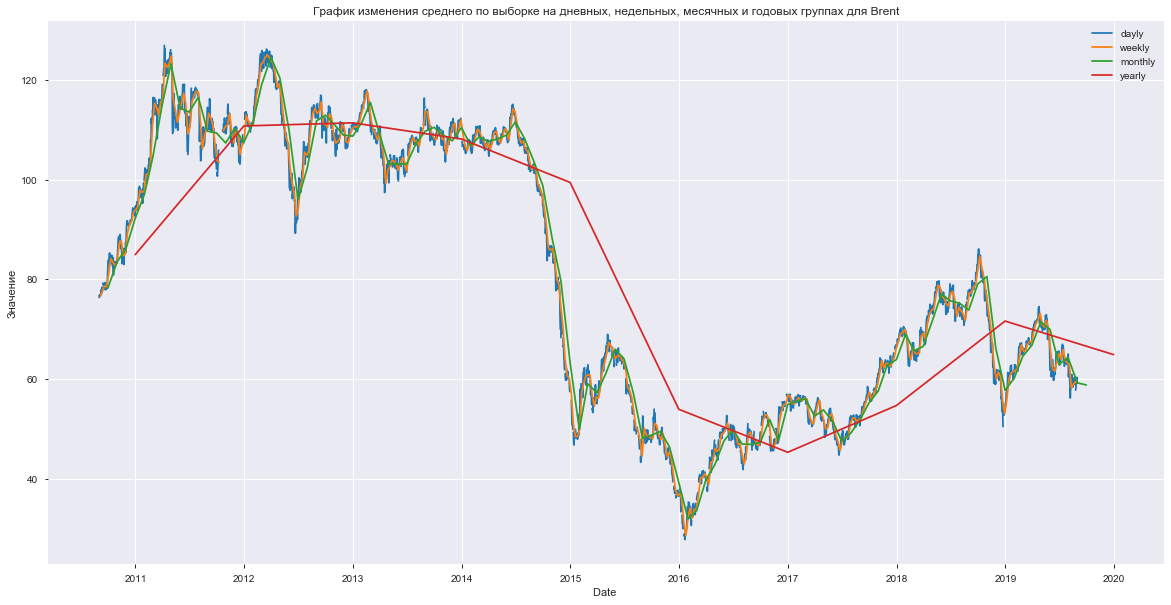

In [30]:
plt.figure(figsize=(20,10))
plt.plot(df_brent.resample("D").mean().index, df_brent.resample("D").mean().values)
plt.plot(df_brent.resample("W").mean().index, df_brent.resample("W").mean().values)
plt.plot(df_brent.resample("M").mean().index, df_brent.resample("M").mean().values)
plt.plot(df_brent.resample("Y").mean().index, df_brent.resample("Y").mean().values)


plt.legend(['dayly', 'weekly', 'monthly', 'yearly'])

plt.title('График изменения среднего по выборке на дневных, недельных, месячных и годовых группах для Brent')
plt.xlabel('Date ')
plt.ylabel('Значение');

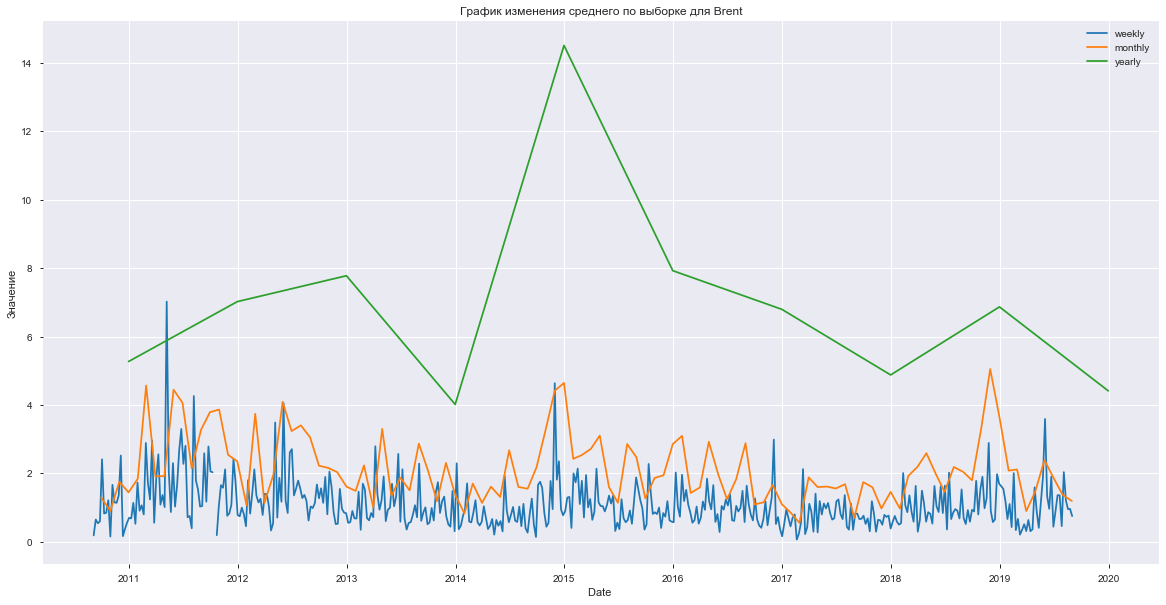

In [32]:
plt.figure(figsize=(20,10))
plt.plot(df_brent.resample("W").std().index, df_brent.resample("W").std().values)
plt.plot(df_brent.resample("M").std().index, df_brent.resample("M").std().values)
plt.plot(df_brent.resample("Y").std().index, df_brent.resample("Y").std().values)
plt.legend(['weekly', 'monthly', 'yearly'])
plt.title('График изменения среднего по выборке для Brent')
plt.xlabel('Date ')
plt.ylabel('Значение');

# 4    Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.

поведение цены не изменилось, график стал более гладким, но все тенденции сохранились.